,Lwr,Bld_Sc,Int_Pnt,X_int,Y_int,Lvl,F_Pnt,X_fac,Y_fac,Ind,Ang,Ang_ind,Hgh,Mean,StdDev
0,1,A,1,8,6,A,A01,1,9,A_A01_01_000,0,1,180,0.307146,0.155512
1,1,A,1,8,6,A,A01,1,9,A_A01_01_010,10,2,180,0.210766,0.132304
2,1,A,1,8,6,A,A01,1,9,A_A01_01_020,20,3,180,0.077277,0.118142
3,1,A,1,8,6,A,A01,1,9,A_A01_01_030,30,4,180,-0.044795,0.100592
4,1,A,1,8,6,A,A01,1,9,A_A01_01_040,40,5,180,-0.066807,0.095624


Shape: (153216, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 153216 entries, 0 to 153215
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Lwr      153216 non-null  int64  
 1   Bld_Sc   153216 non-null  object 
 2   Int_Pnt  153216 non-null  int64  
 3   X_int    153216 non-null  int64  
 4   Y_int    153216 non-null  int64  
 5   Lvl      153216 non-null  object 
 6   F_Pnt    153216 non-null  object 
 7   X_fac    153216 non-null  int64  
 8   Y_fac    153216 non-null  int64  
 9   Ind      153216 non-null  object 
 10  Ang      153216 non-null  int64  
 11  Ang_ind  153216 non-null  int64  
 12  Hgh      153216 non-null  int64  
 13  Mean     153216 non-null  float64
 14  StdDev   153216 non-null  float64
dtypes: float64(2), int64(9), object(4)
memory usage: 18.7+ MB


,Lwr,Int_Pnt,X_int,Y_int,X_fac,Y_fac,Ang,Ang_ind,Hgh,Mean,StdDev
count,153216.0,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000,153216.000000
mean,1.0,18.781250,4.031250,3.093750,14.500000,5.000000,90.000000,10.000000,102.666667,-0.256260,0.176525
std,0.0,11.431175,2.567648,1.958312,8.077774,2.581997,54.772434,5.477243,54.829206,0.495855,0.083742
min,1.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,16.000000,-1.593751,0.011985
25%,1.0,8.750000,2.000000,1.750000,7.750000,3.000000,40.000000,5.000000,60.000000,-0.595559,0.115902
50%,1.0,18.000000,4.000000,3.000000,14.500000,5.000000,90.000000,10.000000,104.000000,-0.451296,0.155313
75%,1.0,29.250000,6.000000,5.000000,21.250000,7.000000,140.000000,15.000000,148.000000,0.101550,0.211597
max,1.0,38.000000,8.000000,6.000000,28.000000,9.000000,180.000000,19.000000,180.000000,0.952414,0.794129



Missing values:
Lwr        0
Bld_Sc     0
Int_Pnt    0
X_int      0
Y_int      0
Lvl        0
F_Pnt      0
X_fac      0
Y_fac      0
Ind        0
Ang        0
Ang_ind    0
Hgh        0
Mean       0
StdDev     0
dtype: int64


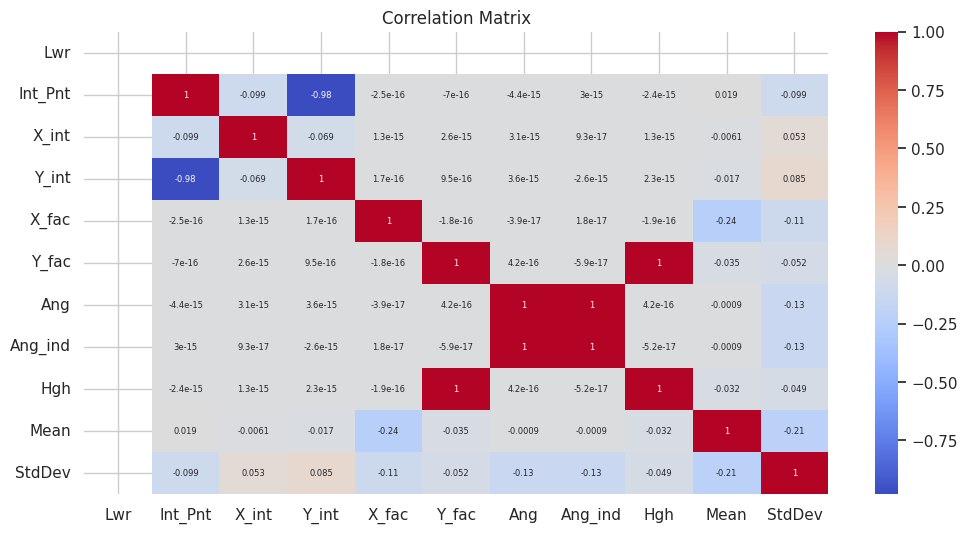

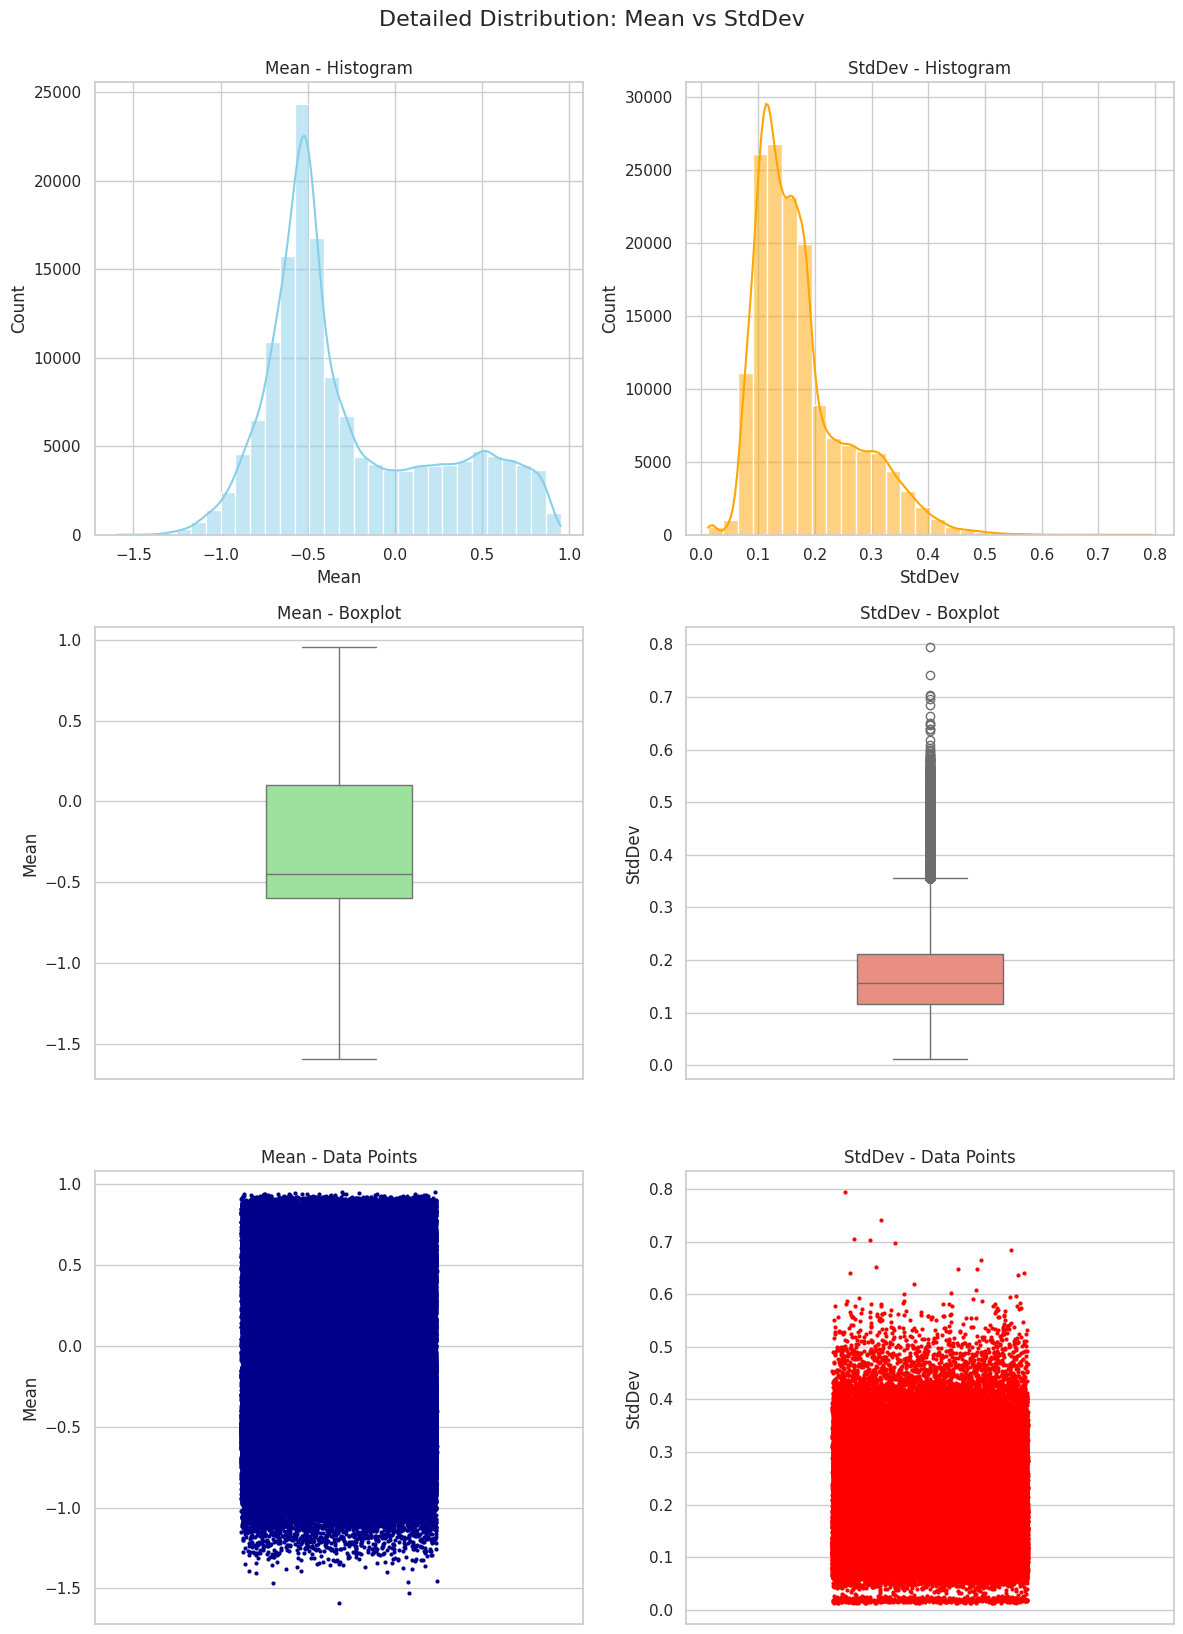

In [5]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Load data
"""df = pd.read_csv("/home/fedor/Projects/Wind_pressure_prediction_2025/data/processed/WindLoading_Interference_01.csv")"""
df = pd.read_csv("/mnt/d/projects/wind_fluctuation_prediction_2025/data/processed/WindLoading_Interference_01.csv")

# Оставляем только строки с Lwr = 1
df = df[df['Lwr'] == 1]

# Preview structure
display(df.head())
print("Shape:", df.shape)
df.info()

# Descriptive statistics
display(df.describe())

# Missing values
print("\nMissing values:")
print(df.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", annot_kws={'size': 6})
plt.title("Correlation Matrix")
plt.show()

# 🧠 Расширенная визуализация переменных Mean и StdDev
fig, axes = plt.subplots(3, 2, figsize=(12, 16))

# 👉 Mean

sns.histplot(df['Mean'], bins=30, ax=axes[0, 0], kde=True, color="skyblue")
axes[0, 0].set_title("Mean - Histogram")

sns.boxplot(y=df['Mean'], ax=axes[1, 0], color="lightgreen", width=0.3)
axes[1, 0].set_title("Mean - Boxplot")

sns.stripplot(y=df['Mean'], ax=axes[2, 0], color="darkblue", size=3, jitter=0.2)
axes[2, 0].set_title("Mean - Data Points")


# 👉 StdDev
sns.histplot(df['StdDev'], bins=30, ax=axes[0, 1], kde=True, color="orange")
axes[0, 1].set_title("StdDev - Histogram")

sns.boxplot(y=df['StdDev'], ax=axes[1, 1], color="salmon", width=0.3)
axes[1, 1].set_title("StdDev - Boxplot")

sns.stripplot(y=df['StdDev'], ax=axes[2, 1], color="red", size=3, jitter=0.2)
axes[2, 1].set_title("StdDev - Data Points")

plt.tight_layout()
plt.suptitle("Detailed Distribution: Mean vs StdDev", fontsize=16, y=1.02)
plt.show()
